# **Homework 4: From Data To Model**

In this homework we will focus on going from the data to a model that generalizes well.

Me: Qiulin Fan, uniquename: rynnefan
### Collaborator:
Weibing Su, uniquename: weibinsu\
Weile Zheng, uniquename: weilez

## Imports

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Part 1: Warmup
We will first start off again with the california housing dataset.

In [3]:
california_housing = fetch_california_housing(return_X_y=True, as_frame=True)
X = california_housing[0]
y = california_housing[1]
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

### <b>Question 1 (9 pts):</b> Redo model by tf.keras.Sequential
Recreate the regression model created in HW 3 using tf.keras.Sequential. While you will have to use the same amount of epochs and batch size, for the optimizer you can use RMSprop with the same learning rate as in HW 3.


In [4]:
def q1():
    input_dim = 8
    model = tf.keras.Sequential([
        # relu
        tf.keras.layers.Dense(2*input_dim, activation='relu', input_shape=(input_dim, )),
        # regression
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                  loss='mean_squared_error')
    return model

model_q1 = q1()
model_q1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=1000)

Epoch 1/100
12/12 [==============================] - 2s 19ms/step - loss: 2.2287 - val_loss: 1.1010
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9185 - val_loss: 0.7884
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6926 - val_loss: 0.6608
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5786 - val_loss: 0.5678
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5043 - val_loss: 0.5125
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4597 - val_loss: 0.4856
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4447 - val_loss: 0.4704
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4331 - val_loss: 0.4712
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4384 - val_loss: 0.4536
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4122 - val_loss: 0.4532
Epoch 11

# Part 2: MNIST to Model
Now we shall switch to the MNIST dataset

In [5]:
(X, y_int), _ = fashion_mnist.load_data()
X = X.reshape(X.shape[0],-1)
y_one_hot = to_categorical(y_int, num_classes=10)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=100)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, X_test.shape

((33600, 784), (18000, 784))

### **Question 2 (9 pts):** Underfit
Create a model that underfits the data after at least 50 epochs.

In [7]:
def q2():
    input_dim = 28*28  #784

    model_digits = tf.keras.Sequential([
        # Use simple layers to underfit
        tf.keras.layers.Dense(10, activation='relu', input_shape=(input_dim,)),
        # softmax
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model_digits.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model_digits

In [8]:
model_q2 = q2()
history_q2 = model_q2.fit(X_train,y_train, epochs=50, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/50
17/17 [==============================] - 1s 30ms/step - loss: 1.9289 - accuracy: 0.2995 - val_loss: 1.6419 - val_accuracy: 0.4165
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 1.5081 - accuracy: 0.4615 - val_loss: 1.4206 - val_accuracy: 0.4911
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 1.3156 - accuracy: 0.5367 - val_loss: 1.2573 - val_accuracy: 0.5689
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 1.1675 - accuracy: 0.6077 - val_loss: 1.1295 - val_accuracy: 0.6215
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 1.0516 - accuracy: 0.6561 - val_loss: 1.0282 - val_accuracy: 0.6654
Epoch 6/50
17/17 [==============================] - 0s 11ms/step - loss: 0.9584 - accuracy: 0.6933 - val_loss: 0.9452 - val_accuracy: 0.7027
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.8815 - accuracy: 0.7262 - val_loss: 0.8725 - val_accuracy: 0.7355
Epoch 8/50
17/17

In [9]:
print(history_q2.history)

{'loss': [1.9288711547851562, 1.5081032514572144, 1.315558671951294, 1.1675034761428833, 1.051605224609375, 0.9583876132965088, 0.8814641237258911, 0.8160650134086609, 0.7586497068405151, 0.7073211669921875, 0.6629389524459839, 0.6247860789299011, 0.5930214524269104, 0.566676139831543, 0.5450043082237244, 0.5260263085365295, 0.510614812374115, 0.49825137853622437, 0.4873904287815094, 0.47847747802734375, 0.47009941935539246, 0.46319442987442017, 0.4566786289215088, 0.45040732622146606, 0.44500818848609924, 0.44017019867897034, 0.4351077973842621, 0.4307532012462616, 0.42691144347190857, 0.42317304015159607, 0.4193999171257019, 0.41624853014945984, 0.4129059612751007, 0.4099704325199127, 0.40710946917533875, 0.4044053852558136, 0.4019085466861725, 0.3995043933391571, 0.39715883135795593, 0.39462795853614807, 0.3925551474094391, 0.39147403836250305, 0.3890562653541565, 0.387264221906662, 0.38528546690940857, 0.384644091129303, 0.3822512924671173, 0.3808186650276184, 0.37879085540771484, 

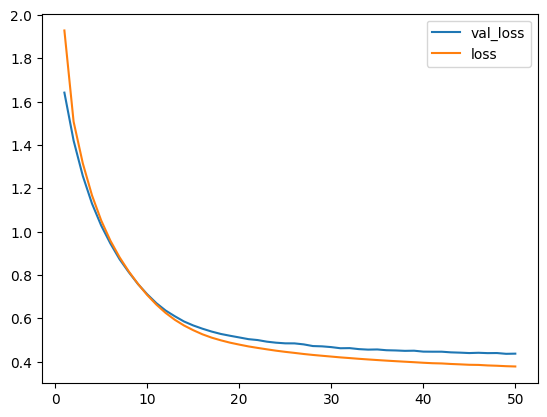

In [10]:
val_loss = history_q2.history["val_loss"]
loss = history_q2.history["loss"]
plt.plot(np.arange(1,len(val_loss)+1), val_loss, label="val_loss")
plt.plot(np.arange(1,len(loss)+1), loss, label="loss")
plt.legend()

### **Question 3 (9 pts):** Overfit
Take the model from question 2 and change it/tweak hyperparameters until it is able to overfit the data. The resulting model does not need to be similar to the answer in question 2.

In [11]:
def q3():
    input_dim = 28*28

    model = tf.keras.Sequential([
        # Increased layers to overfit
        tf.keras.layers.Dense(2 * input_dim, activation='relu', input_shape=(input_dim, )),
        # softmax
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [12]:
ep = 20
bs = 512

In [13]:
model_q3 = q3()
history_q3 = model_q3.fit(X_train,y_train, epochs=ep, batch_size=bs, validation_data=(X_valid, y_valid))

Epoch 1/20
66/66 [==============================] - 2s 12ms/step - loss: 0.6240 - accuracy: 0.7885 - val_loss: 0.4719 - val_accuracy: 0.8238
Epoch 2/20
66/66 [==============================] - 1s 9ms/step - loss: 0.4217 - accuracy: 0.8492 - val_loss: 0.4178 - val_accuracy: 0.8495
Epoch 3/20
66/66 [==============================] - 1s 9ms/step - loss: 0.3562 - accuracy: 0.8717 - val_loss: 0.4721 - val_accuracy: 0.8437
Epoch 4/20
66/66 [==============================] - 1s 13ms/step - loss: 0.3147 - accuracy: 0.8865 - val_loss: 0.4237 - val_accuracy: 0.8470
Epoch 5/20
66/66 [==============================] - 1s 16ms/step - loss: 0.2914 - accuracy: 0.8918 - val_loss: 0.3540 - val_accuracy: 0.8717
Epoch 6/20
66/66 [==============================] - 1s 12ms/step - loss: 0.2624 - accuracy: 0.9037 - val_loss: 0.3752 - val_accuracy: 0.8648
Epoch 7/20
66/66 [==============================] - 1s 10ms/step - loss: 0.2406 - accuracy: 0.9124 - val_loss: 0.3587 - val_accuracy: 0.8736
Epoch 8/20
66/6

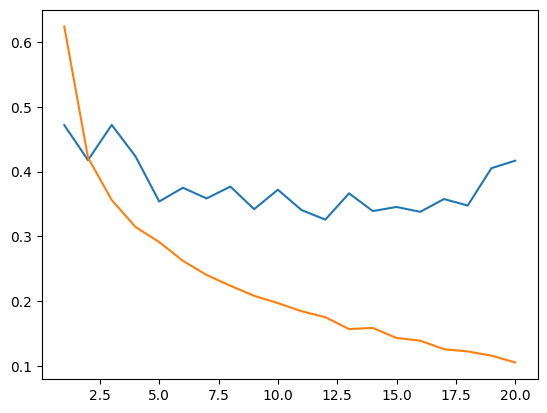

In [14]:
val_loss = history_q3.history["val_loss"]
loss = history_q3.history["loss"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)
plt.plot(np.arange(1,len(val_loss)+1), loss)

### **Question 4 (9 pts):** Early Stopping
From your model in question 3, what do you think is the best stopping point? Note your answer below and why you think it. Then, use keras early stopping on your model from question 3 to have keras automatically do it for you.

**Write what you think here**:

**By my observation, the validation loss of the loss would be  increasingly unstable and start to increase instead of decreasing at epoch 12. So I think the model should early stop there.**




In [15]:
from tensorflow.keras.callbacks import EarlyStopping
model_q4 = q3()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_q4 = model_q4.fit(X_train, y_train, epochs=ep,
                          validation_data=(X_valid, y_valid),
                          batch_size=bs,
                          callbacks=[early_stopping])


Epoch 1/20
66/66 [==============================] - 2s 9ms/step - loss: 0.6375 - accuracy: 0.7849 - val_loss: 0.4853 - val_accuracy: 0.8180
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8477 - val_loss: 0.4074 - val_accuracy: 0.8464
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.8730 - val_loss: 0.3745 - val_accuracy: 0.8662
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.3244 - accuracy: 0.8805 - val_loss: 0.3725 - val_accuracy: 0.8651
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.8929 - val_loss: 0.3733 - val_accuracy: 0.8687
Epoch 6/20
66/66 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.9018 - val_loss: 0.3753 - val_accuracy: 0.8714
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.9092 - val_loss: 0.3535 - val_accuracy: 0.8715
Epoch 8/20
66/66 [==

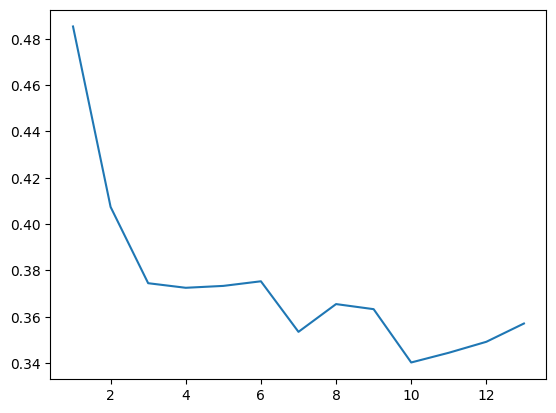

In [16]:
val_loss = history_q4.history["val_loss"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

### **Question 5 (9 pts):** Reducing size of network
Starting with your model from question 3, try to regularize it by reducing size of network. State the process you went through on how you settled on your model.

**Write about the process here**:

**I altered the hyperparameter to have found that 16 layers of relu causes underfitting after 50 epoches, and 2*28*28 = 1568 layers cause overfitting such that the validation loss is out of control over time. I think 128 layers should be a better size to fit the model.**

In [17]:
def q5():
    input_dim = 28*28

    model = tf.keras.Sequential([
        # I think this is the suitiable fitting layer quantity
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
model_q5 = q5()
history_q5 = model_q5.fit(X_train,y_train, epochs=ep, batch_size=bs, validation_data=(X_valid, y_valid))

Epoch 1/20
66/66 [==============================] - 1s 8ms/step - loss: 0.7299 - accuracy: 0.7532 - val_loss: 0.5105 - val_accuracy: 0.8186
Epoch 2/20
66/66 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.8458 - val_loss: 0.4362 - val_accuracy: 0.8451
Epoch 3/20
66/66 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 0.8624 - val_loss: 0.4069 - val_accuracy: 0.8529
Epoch 4/20
66/66 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8755 - val_loss: 0.3841 - val_accuracy: 0.8631
Epoch 5/20
66/66 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8823 - val_loss: 0.3852 - val_accuracy: 0.8600
Epoch 6/20
66/66 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.8882 - val_loss: 0.3586 - val_accuracy: 0.8717
Epoch 7/20
66/66 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.8950 - val_loss: 0.3583 - val_accuracy: 0.8706
Epoch 8/20
66/66 [==

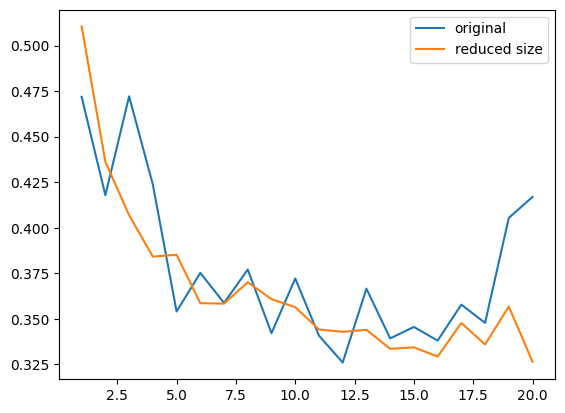

In [19]:
val_loss_q5 = history_q5.history["val_loss"]
val_loss_q3 = history_q3.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
plt.plot(np.arange(1,len(val_loss_q5)+1),val_loss_q5, label="reduced size")
plt.legend()

### **Question 6 (9 pts):** L1 Regularization
Starting with your model from question 3, try to regularize it by using by L1 regularization. State the process you went through on how you settled on your model.

**Write about the process here**:
Note that our size of network is determined by the number of layers of relu. Here we have used too many layers of relu to have caused overfitting, so I added a l1 regularization to increase the sparseness. Through altering hyperparameter, I found 1e-7 a good parameter for l2 regularization.

In [42]:
def q6():
    input_dim = 28*28

    model = tf.keras.Sequential([
        # L1 regularization
        tf.keras.layers.Dense(2*input_dim, activation='relu', input_shape=(input_dim,),
                              kernel_regularizer=regularizers.l1(1e-8)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [46]:
model_q6 = q6()
history_q6 = model_q6.fit(X_train,y_train, epochs=ep, batch_size=bs, validation_data=(X_valid, y_valid))

Epoch 1/20
66/66 [==============================] - 1s 12ms/step - loss: 0.6427 - accuracy: 0.7841 - val_loss: 0.4985 - val_accuracy: 0.8240
Epoch 2/20
66/66 [==============================] - 0s 7ms/step - loss: 0.4200 - accuracy: 0.8510 - val_loss: 0.3956 - val_accuracy: 0.8543
Epoch 3/20
66/66 [==============================] - 0s 8ms/step - loss: 0.3617 - accuracy: 0.8689 - val_loss: 0.4193 - val_accuracy: 0.8539
Epoch 4/20
66/66 [==============================] - 0s 7ms/step - loss: 0.3098 - accuracy: 0.8873 - val_loss: 0.4426 - val_accuracy: 0.8476
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.8929 - val_loss: 0.3322 - val_accuracy: 0.8790
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.9049 - val_loss: 0.3434 - val_accuracy: 0.8781
Epoch 7/20
66/66 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.9133 - val_loss: 0.3468 - val_accuracy: 0.8730
Epoch 8/20
66/66 [=

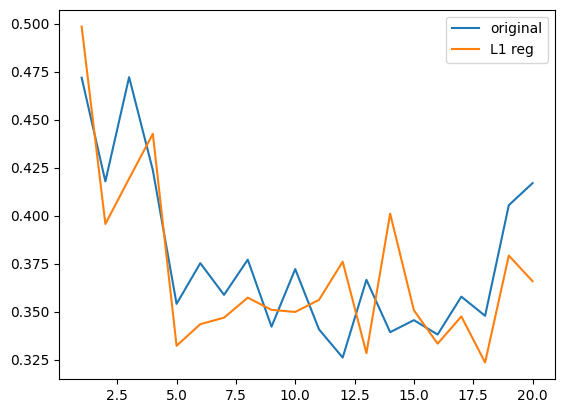

In [47]:
val_loss_q3 = history_q3.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q6 = history_q6.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q6)+1),val_loss_q6, label="L1 reg")
plt.legend()

### **Question 7 (9 pts):** L2 Regularization
Starting with your model from question 3, try to regularize it by using L2 regularization. State the process you went through on how you settled on your model.

**Write about the process here**:
It turns out that through l1 regularization, the model would still be overfitting, though better than q3. So the lack of sparseness is not the only problem. Therefore we can try l2 regularization to distribute the weights better, increasing steadiness. Through altering hyperparameter, I found 1e-8 a good parameter for l2 regularization.

In [25]:
def q7():
    input_dim = 28*28

    model = tf.keras.Sequential([
        # L2 regularization
        tf.keras.layers.Dense(2 * input_dim, activation='relu', input_shape=(input_dim,),
                              kernel_regularizer=regularizers.l2(1e-8)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [33]:
model_q7 = q7()
history_q7 = model_q7.fit(X_train,y_train, epochs=ep, batch_size=bs, validation_data=(X_valid, y_valid))

Epoch 1/20
66/66 [==============================] - 1s 12ms/step - loss: 0.6282 - accuracy: 0.7851 - val_loss: 0.5180 - val_accuracy: 0.8119
Epoch 2/20
66/66 [==============================] - 1s 8ms/step - loss: 0.4177 - accuracy: 0.8497 - val_loss: 0.3958 - val_accuracy: 0.8598
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.3515 - accuracy: 0.8725 - val_loss: 0.4877 - val_accuracy: 0.8182
Epoch 4/20
66/66 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.8854 - val_loss: 0.3793 - val_accuracy: 0.8614
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.8943 - val_loss: 0.4446 - val_accuracy: 0.8452
Epoch 6/20
66/66 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.9017 - val_loss: 0.3429 - val_accuracy: 0.8767
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.9107 - val_loss: 0.4425 - val_accuracy: 0.8523
Epoch 8/20
66/66 [=

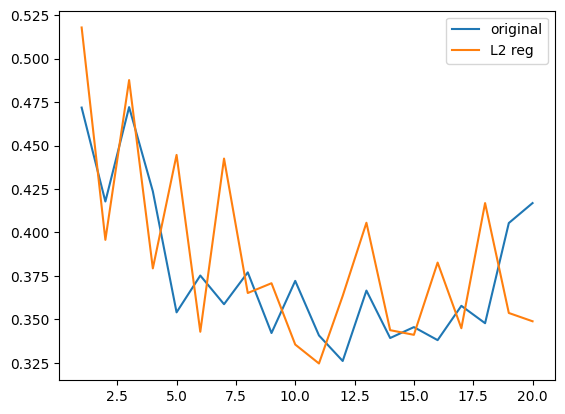

In [34]:
val_loss_q3 = history_q3.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q7 = history_q7.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q7)+1),val_loss_q7, label="L2 reg")
plt.legend()

### **Question 8 (9 pts):** Dropout Regularization
Starting with your model from question 3, try to regularize it by using dropout. State the process you went through on how you settled on your model.

**Write about the process here**:

It turns out that through l2 regularization, the model would still be overfitting. So we can try another dropout regularation after relu the model. I keep altering hyperparameter to have found that dropout 0.5 of features after relu is a good parameter.

In [30]:
from tensorflow.keras.layers import Dropout

def q8():
    input_dim = 28*28

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2 * input_dim, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [31]:
model_q8 = q8()
history_q8 = model_q8.fit(X_train,y_train, epochs=ep, batch_size=bs, validation_data=(X_valid, y_valid))

Epoch 1/20
66/66 [==============================] - 2s 9ms/step - loss: 0.7805 - accuracy: 0.7492 - val_loss: 0.4670 - val_accuracy: 0.8393
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.5243 - accuracy: 0.8216 - val_loss: 0.4296 - val_accuracy: 0.8493
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.4681 - accuracy: 0.8376 - val_loss: 0.3913 - val_accuracy: 0.8576
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.4319 - accuracy: 0.8491 - val_loss: 0.3920 - val_accuracy: 0.8575
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.4061 - accuracy: 0.8560 - val_loss: 0.4031 - val_accuracy: 0.8573
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8636 - val_loss: 0.3580 - val_accuracy: 0.8725
Epoch 7/20
66/66 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8674 - val_loss: 0.3662 - val_accuracy: 0.8701
Epoch 8/20
66/66 [==

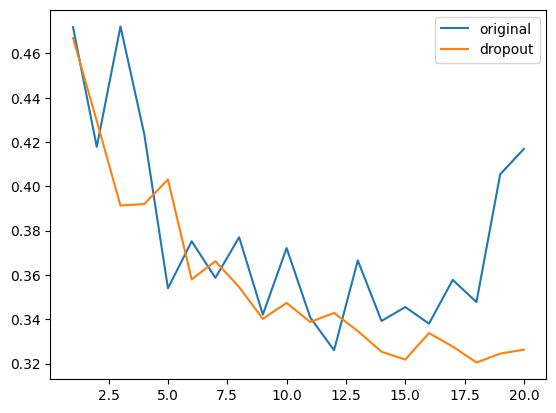

In [32]:
val_loss_q3 = history_q3.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q8 = history_q8.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q8)+1),val_loss_q8, label="dropout")
plt.legend()

### **Question 9 (9 pts):** Combine 5-8
Starting with your model from question 3, try to regularize it by using a combination of the methods used in questions 5-8. Make changes to hyperparameters and have the model stop at a good epoch. State the process you went through on how you settled on your model.

**Write about the process here**:

L2 regularization does not seem to be helpful, while l1 is helpful but overfitting still exist by merely using l1 regularizaion. Drop out regularizaion is helpful, so we can first pick a suitable size of network, then combine l1 and dropout regularization, and then alter hyperparameters.

In [56]:
from tensorflow.keras.layers import Dropout
def q9():
    input_dim = 28*28
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)
        ,kernel_regularizer=regularizers.l1(1e-7)),
        Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [57]:
model_q9 = q9()

# fill in the arguments for model_q9.fit() below
history_q9 = model_q9.fit(X_train,y_train, epochs=ep, batch_size=bs,
                          validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/20
66/66 [==============================] - 1s 7ms/step - loss: 0.9727 - accuracy: 0.6780 - val_loss: 0.5187 - val_accuracy: 0.8133
Epoch 2/20
66/66 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7915 - val_loss: 0.4559 - val_accuracy: 0.8350
Epoch 3/20
66/66 [==============================] - 0s 5ms/step - loss: 0.5280 - accuracy: 0.8173 - val_loss: 0.4279 - val_accuracy: 0.8435
Epoch 4/20
66/66 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.8301 - val_loss: 0.4097 - val_accuracy: 0.8525
Epoch 5/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8388 - val_loss: 0.3949 - val_accuracy: 0.8590
Epoch 6/20
66/66 [==============================] - 0s 5ms/step - loss: 0.4325 - accuracy: 0.8469 - val_loss: 0.3893 - val_accuracy: 0.8614
Epoch 7/20
66/66 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8502 - val_loss: 0.3808 - val_accuracy: 0.8648
Epoch 8/20
66/66 [==

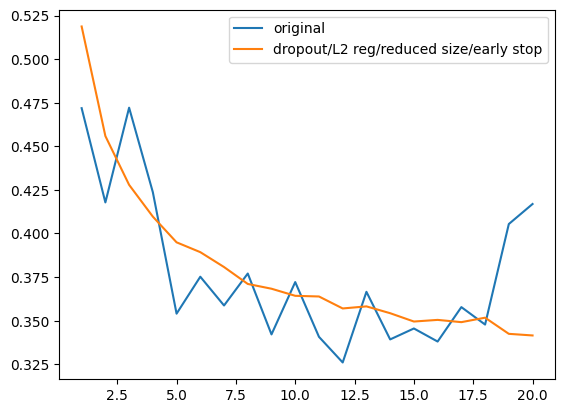

In [58]:
val_loss_q3 = history_q3.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q9 = history_q9.history["val_loss"]
plt.plot(np.arange(1,len(val_loss_q9)+1),val_loss_q9, label="dropout/L2 reg/reduced size/early stop")
plt.legend()

### **Question 10 (9 pts):** Test loss of Model 2-9
Take the models from question 2 to 9 and find their test loss.

In [59]:
models_list = [globals()[f'model_q{i}'] for i in range(2, 10)]

In [60]:
test_losses = []
i = 2
for model in models_list:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    test_losses.append(round(test_loss,5))
    print(f"Test Loss of model {i}: {test_loss}, Test Accuracy of model {i}: {test_accuracy}")
    i+=1

563/563 [==============================] - 1s 2ms/step - loss: 0.4167 - accuracy: 0.8524
Test Loss of model 2: 0.416743665933609, Test Accuracy of model 2: 0.8524444699287415
563/563 [==============================] - 2s 3ms/step - loss: 0.4328 - accuracy: 0.8769
Test Loss of model 3: 0.4328499138355255, Test Accuracy of model 3: 0.8769444227218628
563/563 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8799
Test Loss of model 4: 0.34888505935668945, Test Accuracy of model 4: 0.8799444437026978
563/563 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8855
Test Loss of model 5: 0.3278467655181885, Test Accuracy of model 5: 0.8855000138282776
563/563 [==============================] - 2s 3ms/step - loss: 0.3670 - accuracy: 0.8883
Test Loss of model 6: 0.36703479290008545, Test Accuracy of model 6: 0.8882777690887451
563/563 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8901
Test Loss of model 7: 0.357685

### **Question 11 (10 pts):**
If you had to use one of these models, which one would you use and why?

**Write answer here**:

I would use the combined model. Though the early stopping has a better performace on the testing, combined model is model stable as we can view from the loss graph that the validation loss goes down smoothly.